## Taller de Introducción a la Mecánica Cuántica
Este archivo es una prueba para verificar que python y jupyter estan bien instalados, si se logran visualizar dos gráficas eso quiere decir que esta todo listo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants as C

In [2]:
#<------------------------Funcion de la radiacion de cuerpo negro------------------>
def black_body_freq(v,T):
    a=2*h*v**5/c**3
    b=h*v/(k*T)
    i=a/(np.exp(b)-1)
    return i

In [3]:
#<-----------------------Constantes--------------------------------------------->
c=C.c;k=C.Boltzmann;h=C.h;pi=np.pi;wien_c=C.Wien
#<------------------------------Calculo para diferentes temperaturas----------------------------->
lon=np.arange(0.2,2.2,0.001)*1e-6
#<--------------------------Longitudes a frecuencias----------------------------------------->
freq=c/lon

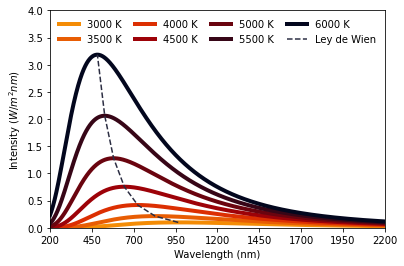

In [4]:
#<---------------------------Lista de temperaturas----------------------------->
T_list=np.array([3000,3500,4000,4500,5000,5500,6000])
T_color=["F48C06","e85d04","DC2F02","9D0208","6A040F","370617","03071E"]
max_lon=[];max_spec=[]
for T,color in zip(T_list,T_color):
    spec=black_body_freq(freq,T)
    #<------------------------------W/m2srHZ -> W/m2 nm----------------------------------------->
    spec=spec*10**(26-39)
    #<--------------------------Localizacion del especto maximo--------------------------------->
    max_point=np.max(spec)
    max_spec=np.append(max_spec,max_point)
    #<--------------------------------Localizacion de la longitud maxima---------------------------------->
    loc=np.where(max_point==spec)[0]
    max_lon=np.append(max_lon,lon[loc]*1e9)
    #<------------------------------------Grafica de cada temperatura------------------------------->
    plt.plot(lon*1e9,spec,label=str(T)+" K",lw="4",color="#"+color)
plt.plot(max_lon,max_spec,label="Ley de Wien",color="#2b2d42",ls="--")
plt.ylabel("Intensity ($W/m^2 nm$)")
plt.xlabel("Wavelength (nm)")
plt.xlim(200,2200)
plt.ylim(0,4)
plt.xticks(np.arange(200,2200+250,250))
plt.yticks(np.arange(0,4.5,.5))
plt.legend(frameon=False,mode="expand",ncol=4)
plt.show()

Constante de Wien obtenida 0.0028967661168609986
La diferencia relativa es 0.0347


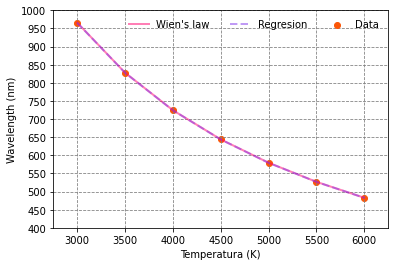

In [5]:
#<----------------------Comprobación de la Ley de Wien----------------------->
max_lon=max_lon*1e-9
T=1/T_list
#<--------------------------Fit lineal------------------------------------->
fit=np.polyfit(T,max_lon,1)
wien=wien_c*T
DR=round(abs(wien_c-fit[0])/wien_c*100,4)
print("Constante de Wien obtenida",fit[0])
print("La diferencia relativa es",DR)
fit=fit[0]*T
#<-------------------------Inicio de la grafica----------------------------->
plt.scatter(T_list,max_lon*1e9,label="Data",c="#fb5607")
plt.plot(T_list,wien*1e9,label="Wien's law",alpha=0.5,lw="2",color="#ff006e")
plt.plot(T_list,fit*1e9,label="Regresion",alpha=0.5,lw="2",ls="--",color="#8338ec")
#<-----------------------------------Leyenda de cada ploteo------------------------------->
plt.legend(frameon=False,ncol=3)
#<--------------------------------Limites de la grafica--------------------------->
plt.ylim(400,1000)
plt.xlim(2750,6250)
plt.yticks(np.arange(400,1050,50))
plt.grid(ls="--",color="grey")
#<-----------------------------Leyenda de cada eje-------------------------------->
plt.xlabel("Temperatura (K)")
plt.ylabel("Wavelength (nm)")
plt.show()
#plt.savefig("Graphics/wien_law.png",dpi=100)